<a href="https://colab.research.google.com/github/MphoPetunia/SpecsSurveyData/blob/main/companyproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Data Cleaning and Exploration***

TTo start,I will be loading to and exploring the dataset to manipulate and analyze the data easily.

In [2]:
import pandas as pd

data =pd.read_csv("Dots Customer Survey.csv")
data.head()




,Unique ID,Country,Age,Annual Family Income ($),Gender,Time spent watching videos/TV,Time spent playing indoor sports,Time spent playing outdoor sports,Total Time spent working in front of screen,Sleeping hours,...,Has OTT subscription,Number of friends,Likes spicy food,Likes desserts,Wants to change career,Has debt,Has kids,Drinks alcohol,Smoker,Wear Specs
0,7319483,CAN,13,20423,Male,3,4,3,7,8,...,1,4,0,1,0,0,0,0,0,1
1,4791965,CAN,13,5570,Female,3,3,1,10,3,...,1,6,0,1,0,0,0,0,1,1
2,2991718,CAN,13,58706,Female,2,2,1,4,9,...,0,5,0,0,0,0,0,0,0,0
3,4220106,CAN,13,57118,Male,6,2,4,10,11,...,1,9,0,1,0,0,0,0,0,0
4,2263008,CAN,14,59834,Male,6,3,4,13,12,...,1,6,1,0,0,0,0,0,0,0


# Identifing Missing Values and Inconsistencies

In [3]:
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Unique ID                                                  0
Country                                                    0
Age                                                        0
Annual Family Income ($)                                   0
Gender                                                     0
Time spent watching videos/TV                              0
Time spent playing indoor sports                           0
Time spent playing outdoor sports                          0
Total Time spent working in front of screen                0
Sleeping hours                                             0
IQ                                                         0
Whether parents have specs                                 0
English speaker                                            0
Migrated within country                                    0
Migrated overseas                                          0
Maritial Status (0 - Single, 1 - Married, 2 - Divorced)    0
Has Diab

If there are missing values- we can handle themby either filling them with appropriate values such as mean or median or dropping those rows.

# Exploring Data Characteristics

Next, will exploe the data types, values ranges and summary statistics to understand the dataest better.

In [4]:
#Displaying data types and basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 29 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Unique ID                                                3220 non-null   int64 
 1   Country                                                  3220 non-null   object
 2   Age                                                      3220 non-null   int64 
 3   Annual Family Income ($)                                 3220 non-null   int64 
 4   Gender                                                   3220 non-null   object
 5   Time spent watching videos/TV                            3220 non-null   int64 
 6   Time spent playing indoor sports                         3220 non-null   int64 
 7   Time spent playing outdoor sports                        3220 non-null   int64 
 8   Total Time spent working in front of s

In [5]:
Summary_Statistics = data.describe()
print("\nSummary Statistics:")
print(Summary_Statistics)




Summary Statistics:
          Unique ID          Age  Annual Family Income ($)  \
count  3.220000e+03  3220.000000               3220.000000   
mean   4.988139e+06    44.834161              20578.639130   
std    2.867911e+06    19.073161              15079.429422   
min    1.683000e+03    13.000000                 10.000000   
25%    2.516499e+06    29.000000               8494.000000   
50%    5.041256e+06    44.000000              16982.000000   
75%    7.459871e+06    60.000000              30965.250000   
max    9.999011e+06    91.000000              59858.000000   

       Time spent watching videos/TV  Time spent playing indoor sports  \
count                    3220.000000                       3220.000000   
mean                        4.347205                          1.991925   
std                         2.807803                          1.205222   
min                         0.000000                          0.000000   
25%                         2.000000              

## Analyzing Feature Distribution

To analyze the distribution of features- we can use histograms and box plots, this helps to identify outliers and understand the relationships between features.

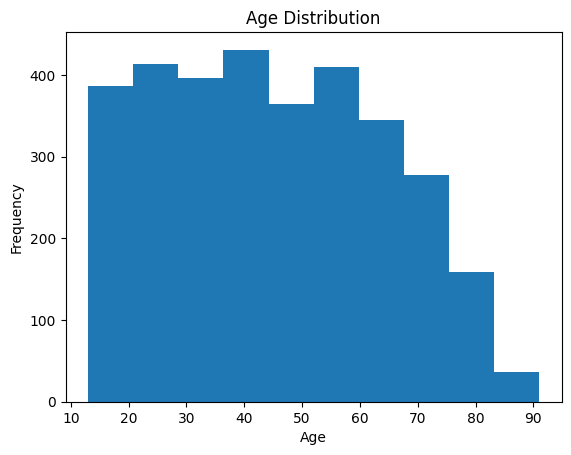

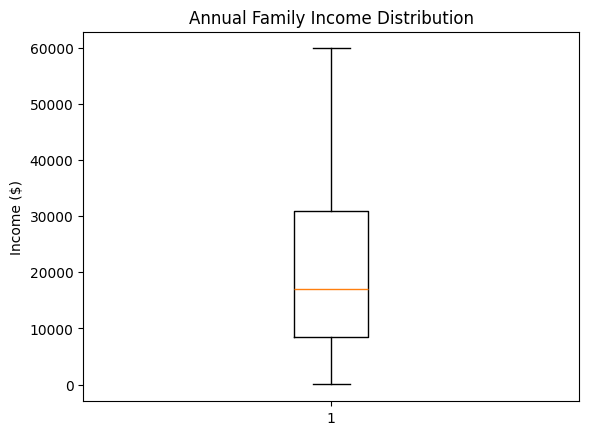

In [6]:
import matplotlib.pyplot as plt

# Histogram for 'Age' feature
plt.hist(data['Age'], bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plot for 'Annual Family Income'
plt.boxplot(data['Annual Family Income ($)'])
plt.title('Annual Family Income Distribution')
plt.ylabel('Income ($)')
plt.show()


**Insights from Task 1:**

**Data Quality:** Identifying and handling missing values is important for ensuring accurate model predictions. For instance, if many respondents did not answer a question about screen time, this could skew results.

**Feature Distribution:** Understanding how features like age and income are distributed helps in determining if transformations or scaling are needed before modeling.

**Outliers:** Features such as income may have outliers that could affect model performance. Visualizations like box plots help in identifying these outliers.

# *Feature Engineering and Visualization*

The second task focuses on enhancing the dataset by creating features and exploring the relationship between variables to gain insights and improve the model's performance.

Feature Engineering helps with:


*   Creating new variables that might capture hidden patterns.
*   Improve the accuracyof predictions by providing the model with more relevant data.







In [7]:
#Creating New Features
#A few potential new features for this dataset may include;
#1. Screen-to-sleep Ratio
#2. Active Ratio
#3. Sleep Sufficiency

# Create Screen-to-Sleep Ratio
data['Screen_to_Sleep_Ratio'] = data['Total Time spent working in front of screen'] / data['Sleeping hours']

# Create Active Ratio
data['Active_Ratio'] = data['Time spent playing outdoor sports'] / (data['Total Time spent working in front of screen'] + 1e-5)

# Create Sleep Sufficiency (7+ hours is sufficient)
data['Sleep_Sufficiency'] = data['Sleeping hours'].apply(lambda x: 'Sufficient' if x >= 7 else 'Insufficient')

# Verify new features
print("New Features Summary:")
print(data[['Screen_to_Sleep_Ratio', 'Active_Ratio', 'Sleep_Sufficiency']].head())


New Features Summary:
   Screen_to_Sleep_Ratio  Active_Ratio Sleep_Sufficiency
0               0.875000      0.428571        Sufficient
1               3.333333      0.100000      Insufficient
2               0.444444      0.249999        Sufficient
3               0.909091      0.400000        Sufficient
4               1.083333      0.307692        Sufficient


In [8]:
print(data.columns)

Index(['Unique ID', 'Country', 'Age', 'Annual Family Income ($)', 'Gender',
       'Time spent watching videos/TV', 'Time spent playing indoor sports',
       'Time spent playing outdoor sports',
       'Total Time spent working in front of screen', 'Sleeping hours', 'IQ',
       'Whether parents have specs', 'English speaker',
       'Migrated within country', 'Migrated overseas',
       'Maritial Status (0 - Single, 1 - Married, 2 - Divorced)',
       'Has Diabetes', 'Education Status', 'Has Gym Subscription',
       'Has OTT subscription', 'Number of friends', 'Likes spicy food',
       'Likes desserts', 'Wants to change career', 'Has debt', 'Has kids',
       'Drinks alcohol', 'Smoker', 'Wear Specs', 'Screen_to_Sleep_Ratio',
       'Active_Ratio', 'Sleep_Sufficiency'],
      dtype='object')


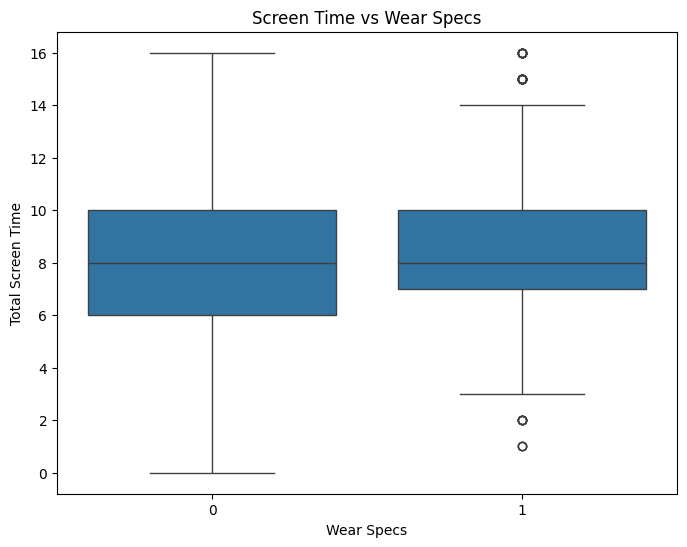

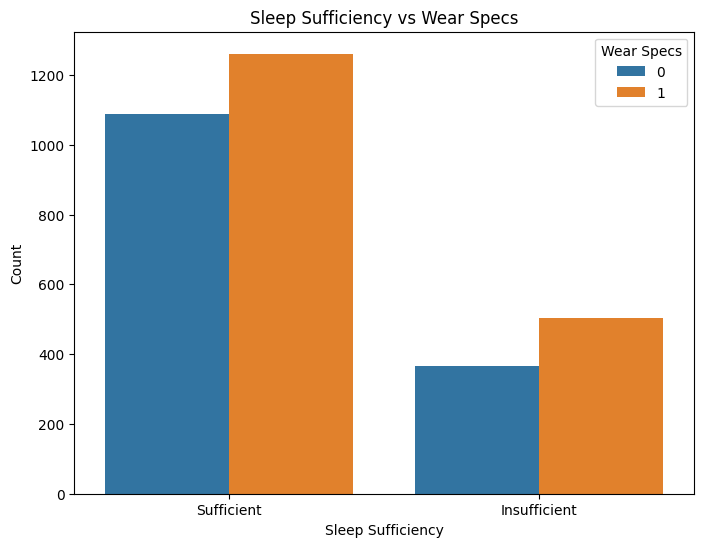

In [9]:
#Exploring Relationships
#Visualizing data helps identify patterns and relationships between variables for example:
#1. Relationship between screen time and WearsSpecs
#2. Impact to sleep sufficiency on Wear Specs


import seaborn as sns
import matplotlib.pyplot as plt

# Plot the relationship between Screen Time and Glasses Usage
plt.figure(figsize=(8, 6))
sns.boxplot(x='Wear Specs', y='Total Time spent working in front of screen', data=data)
plt.title("Screen Time vs Wear Specs")
plt.xlabel("Wear Specs")
plt.ylabel("Total Screen Time")
plt.show()

# Bar plot for Sleep Sufficiency and Glasses Usage
plt.figure(figsize=(8, 6))
sns.countplot(x='Sleep_Sufficiency', hue='Wear Specs', data=data)
plt.title("Sleep Sufficiency vs Wear Specs")
plt.xlabel("Sleep Sufficiency")
plt.ylabel("Count")
plt.show()


Step 3: Exploring Relationships with Scatter Plots

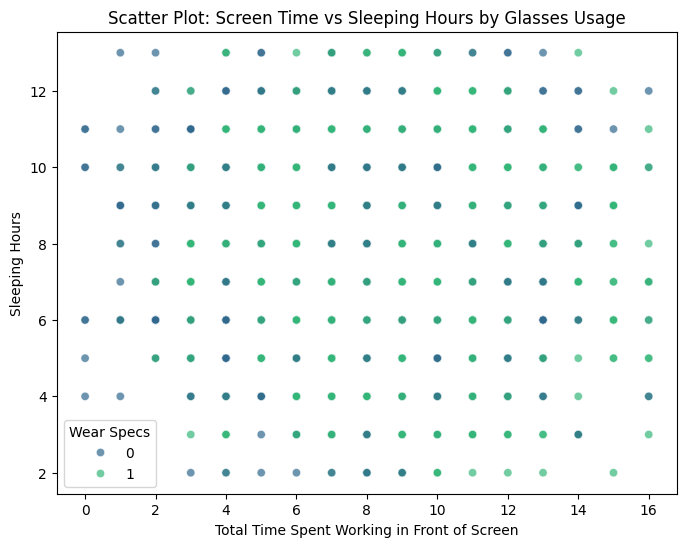

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Total Time spent working in front of screen',
    y='Sleeping hours',
    hue='Wear Specs',
    data=data,
    palette='viridis',
    alpha=0.7
)
plt.title("Scatter Plot: Screen Time vs Sleeping Hours by Glasses Usage")
plt.xlabel("Total Time Spent Working in Front of Screen")
plt.ylabel("Sleeping Hours")
plt.legend(title="Wear Specs")
plt.show()


Step 4: Performing Correlation Anaysis
Ina the final step I will copute a correlation matrix to identify correlation features.
In the final step I will compute a correlation matrix to identify correlated features.

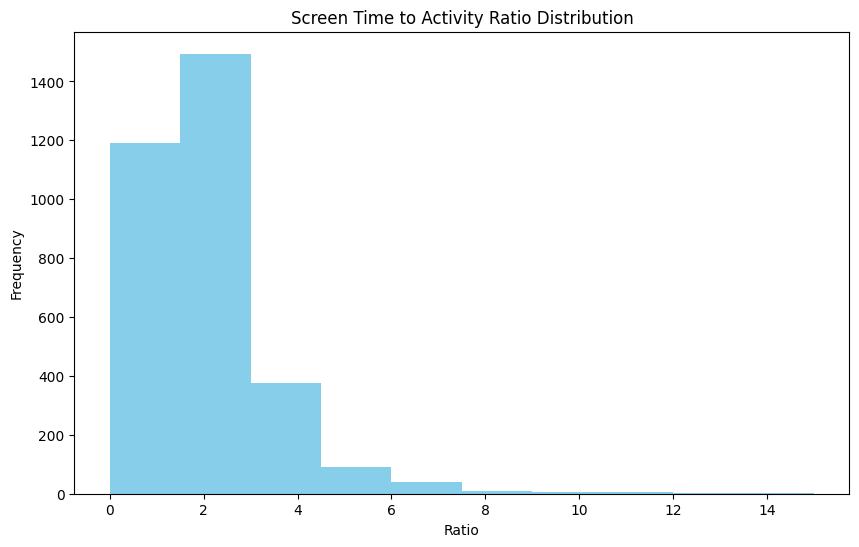

In [10]:
# Creating a new feature
data['Screen_Time_Activity_Ratio'] = data['Total Time spent working in front of screen'] / (data['Time spent playing indoor sports'] + data['Time spent playing outdoor sports'] + 1)

# Histogram for Screen Time to Activity Ratio
plt.figure(figsize=(10, 6))
plt.hist(data['Screen_Time_Activity_Ratio'], bins=10, color='skyblue')
plt.title('Screen Time to Activity Ratio Distribution')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.show()


# Model Building and Evaluation

The evaluation of this machine learning model highlights critical factors influencing eyewear usage among surveyed individuals. By understanding these predictors, stakeholders can make informed decisions in marketing, health awareness, and product development tailored to consumer needs. The insights derived from this analysis not only enhance our understanding of consumer behavior but also provide actionable strategies for businesses and health organizations.